# Explore here

In [145]:
# Your code here

import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns



In [146]:
# Configuración de estilo

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [147]:
# Cargar dataset

url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'

df = pd.read_csv(url)

# Mostrar las primeras filas del dataset

df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [148]:
# Dimensiones del dataset (filas, columnas)

print("Dimensiones del dataset:", df.shape)

# Nombres de las columnas

print("Columnas del dataset:")
print(df.columns.tolist())

Dimensiones del dataset: (48895, 16)
Columnas del dataset:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [149]:

# Información general del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [150]:

# Conteo de valores nulos

print("Valores nulos por columna:")
print(df.isnull().sum())

# Cantidad de valores únicos por columna

print("Valores únicos por columna:")
print(df.nunique())

Valores nulos por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Valores únicos por columna:
id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude   

In [151]:
# Estadísticas descriptivas de columnas numéricas

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [152]:
# Eliminando columnas irrelevantes para el análisis exploratorio

cols_to_drop = ['id', 'name', 'host_name', 'last_review']       # Columnas objetivo

cols_present = [c for c in cols_to_drop if c in df.columns]     # Intersección con las columnas reales del df
print("Detectadas en el df para eliminar:", cols_present)

print("Shape antes:", df.shape) #  Shape antes del drop

# Eliminar y reasignar

if cols_present:
    df = df.drop(columns=cols_present)
    print("Eliminadas.")
else: 
    print("No se encontraron esas columnas en el df.")

# Revisar shape y columnas después del drop

print("Shape después:", df.shape)
print("Columnas restantes:", list(df.columns))

Detectadas en el df para eliminar: ['id', 'name', 'host_name', 'last_review']
Shape antes: (48895, 16)
Eliminadas.
Shape después: (48895, 12)
Columnas restantes: ['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Resumen de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


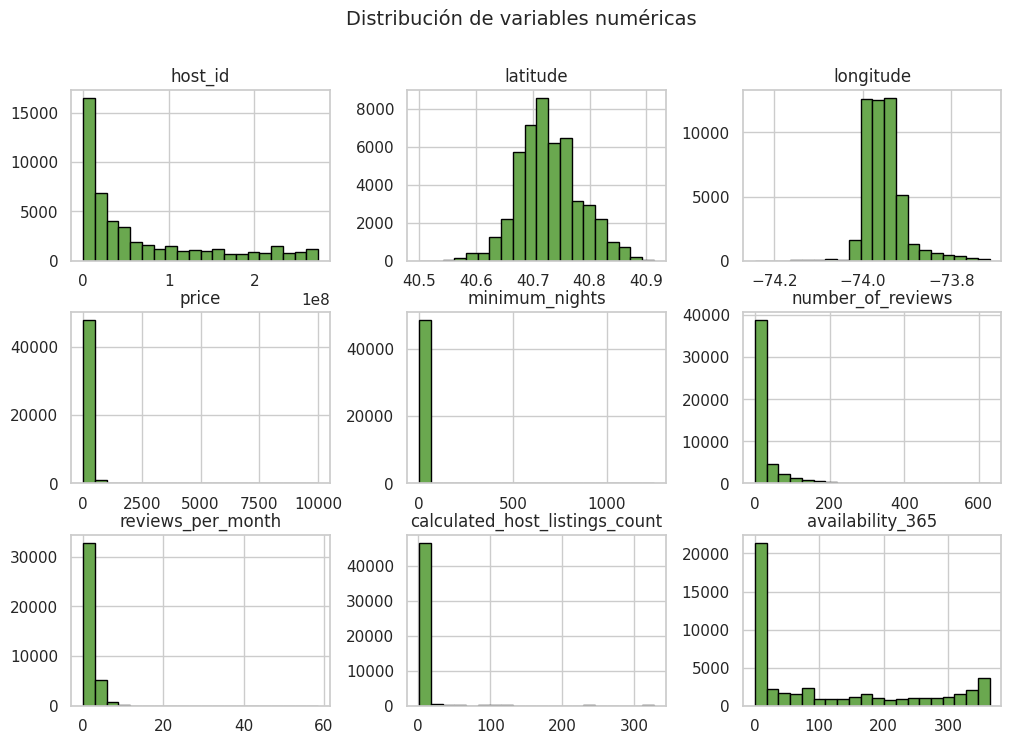

In [153]:
# Selección de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Resumen de variables numéricas:")
display(df[num_cols].describe().T)

# Histograma general de numéricas
df[num_cols].hist(bins=20, figsize=(12, 8), color="#6aa84f", edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

Columnas categóricas a analizar: ['neighbourhood_group', 'neighbourhood', 'room_type']


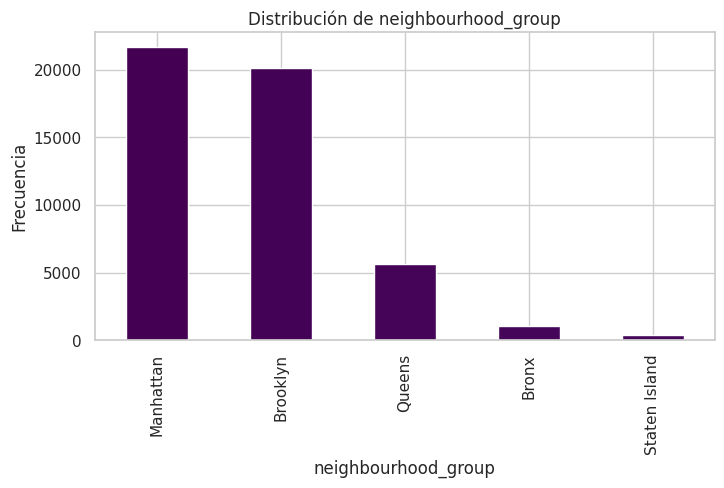

'neighbourhood' tiene 221 categorías — se mostrarán las 10 más frecuentes + 'Otros'.


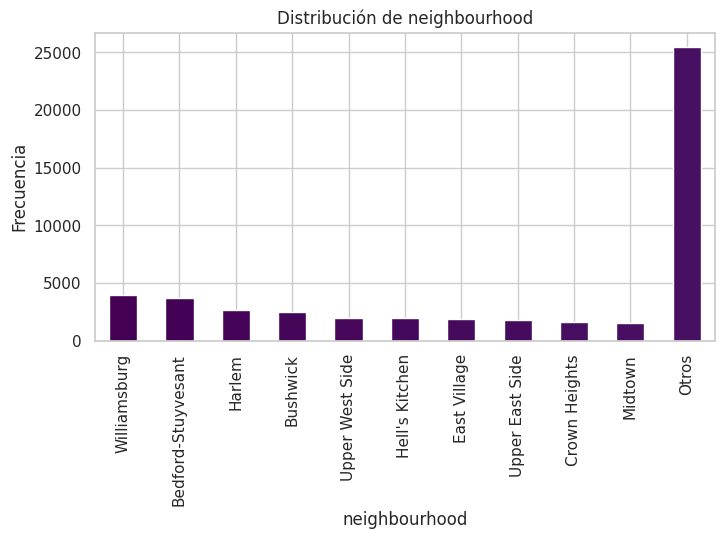

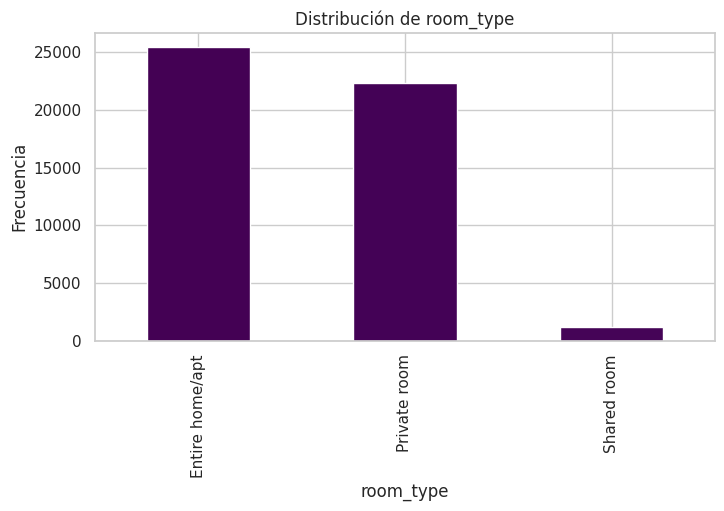

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#Analisis de columnas categoricas

def analizar_columnas_categoricas(df):
    for col in df.select_dtypes(include='object').columns:
        print(f"Analisis de columna: {col}")

        n_unique = df[col].nunique()
        print(f"{n_unique} valores únicos")

        if n_unique > 15:
            print(f"'{col}' tiene {n_unique} categorías — se mostrarán las 10 más frecuentes + 'Otros'.")
            top_counts = df[col].value_counts().nlargest(10)
            others_count = df[col].value_counts().iloc[10:].sum()

# Seleccionamos solo columnas categóricas relevantes

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cols_to_skip = ['id', 'name', 'host_name', 'last_review']
cat_cols = [col for col in cat_cols if col not in cols_to_skip]

print("Columnas categóricas a analizar:", cat_cols)

for col in cat_cols:
    n_unique = df[col].nunique(dropna=True)

    if n_unique > 15:
        print(f"'{col}' tiene {n_unique} categorías — se mostrarán las 10 más frecuentes + 'Otros'.")
        top_counts = df[col].value_counts().nlargest(10)
        others_count = df[col].value_counts().iloc[10:].sum()
        counts = pd.concat([top_counts, pd.Series({'Otros': others_count})])
    else:
        counts = df[col].value_counts()

    if counts.size <= 1:
        print(f"Se omite '{col}' (sin variabilidad).")
        continue

    # Graficar con matplotlib
    
    x = counts.index.astype(str)
    y = counts.values
    cmap = plt.colormaps['viridis']
    colors = cmap(range(len(counts))) 

    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar', color=colors)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

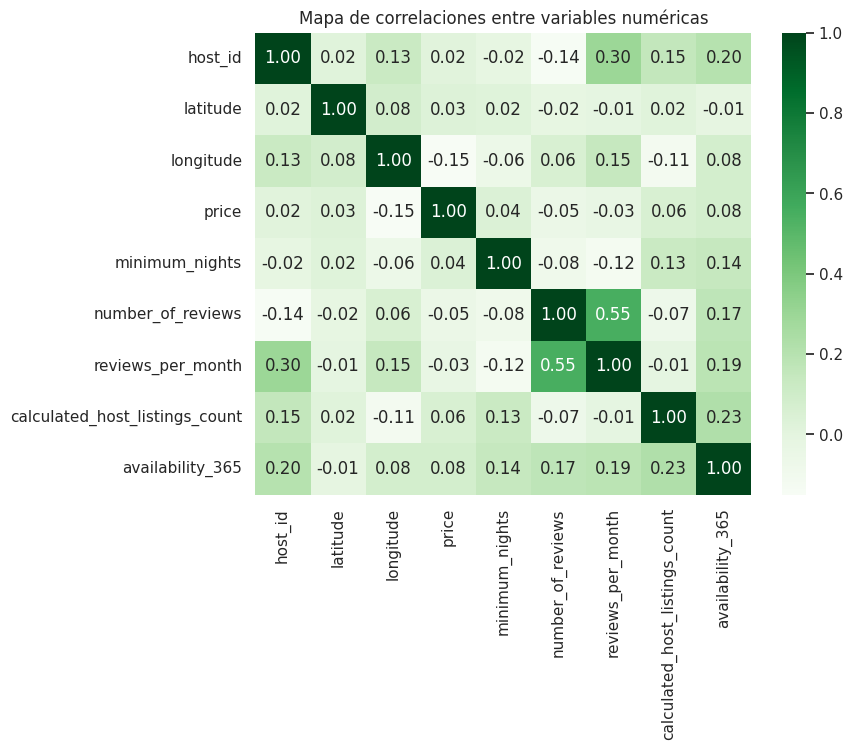

In [155]:
# Mapa de correlaciones numéricas

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens', fmt=".2f")
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

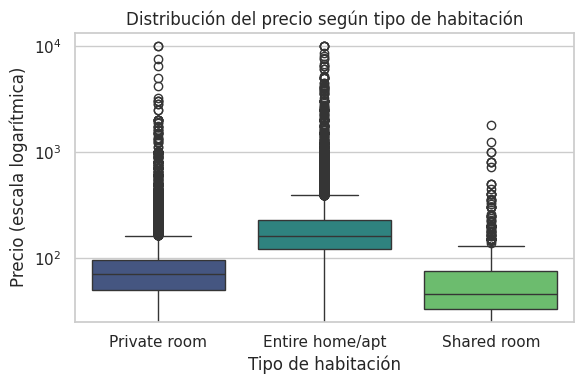

In [156]:
# Relación entre tipo de habitación y precio

plt.figure(figsize=(6, 4))

sns.boxplot(data=df, x='room_type', y='price', hue='room_type', palette="viridis", legend=False)

plt.yscale("log")
plt.title("Distribución del precio según tipo de habitación")
plt.xlabel("Tipo de habitación")
plt.ylabel("Precio (escala logarítmica)")
plt.tight_layout()
plt.show()


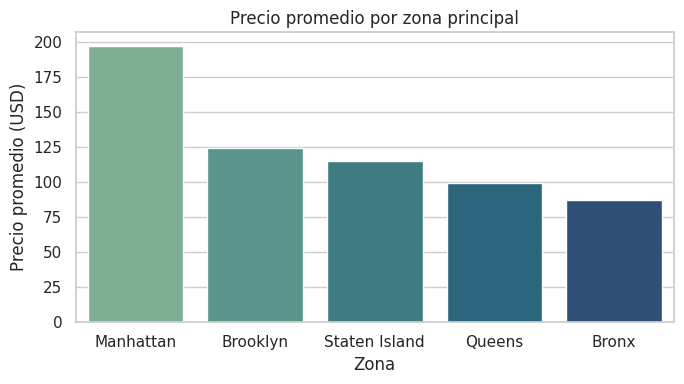

In [157]:
# Relación entre neighbourhood_group y precio promedio

# Precio promedio por zona principal
plt.figure(figsize=(7,4))
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(
    data=avg_price,
    x='neighbourhood_group',
    y='price',
    hue='neighbourhood_group',
    palette="crest",
    legend=False
)
plt.title("Precio promedio por zona principal")
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Zona")
plt.tight_layout()
plt.show()

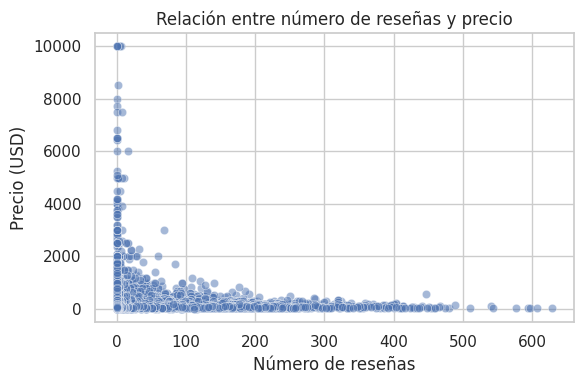

In [158]:
# Relación entre número de reseñas y precio

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title("Relación entre número de reseñas y precio")
plt.xlabel("Número de reseñas")
plt.ylabel("Precio (USD)")
plt.tight_layout()
plt.show()

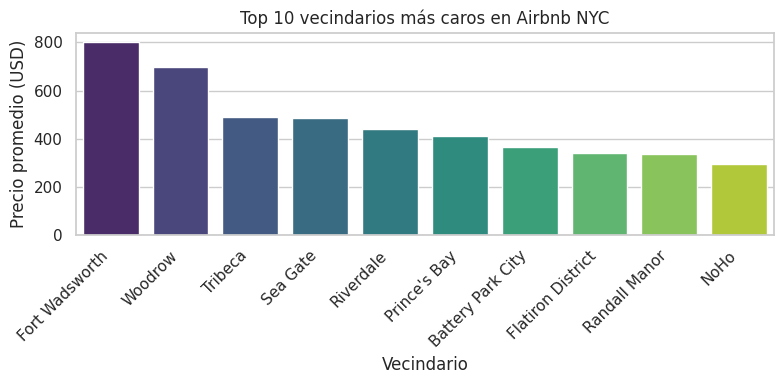

In [159]:
# Top 10 vecindarios más caros en Airbnb NYC

# Calcular el precio promedio por vecindario

top_neighbourhoods = (df.groupby('neighbourhood')['price'].mean().nlargest(10).reset_index())

plt.figure(figsize=(8, 4))

sns.barplot(
    data=top_neighbourhoods,
    x='neighbourhood',
    y='price',
    hue='neighbourhood',
    palette="viridis",
    legend=False             
)

# Estilo del gráfico

plt.title("Top 10 vecindarios más caros en Airbnb NYC", fontsize=12)
plt.ylabel("Precio promedio (USD)")
plt.xlabel("Vecindario")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Verificar nulos restantes

print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [161]:
# Convertir variables categoricas a numericas

from sklearn.preprocessing import LabelEncoder

label_cols = ['neighbourhood_group', 'room_type']

encoder = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])



In [162]:
# Division de dataset en Train y Test

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Tamaño del dataset de entrenamiento: {train_df.shape}")
print(f"Tamaño del dataset de prueba: {test_df.shape}")

Tamaño del dataset de entrenamiento: (39116, 12)
Tamaño del dataset de prueba: (9779, 12)


In [163]:
# Guardar los datos procesados

import os

# Crear carpeta si no existe

os.makedirs("./data/processed", exist_ok=True)

# Guardar datasets

train_df.to_csv("./data/processed/airbnb_train.csv", index=False)
test_df.to_csv("./data/processed/airbnb_test.csv", index=False)

print("Archivos guardados correctamente en ./data/processed/")

Archivos guardados correctamente en ./data/processed/
